<a href="https://colab.research.google.com/github/Poojapalivela/FMML-LAB-1/blob/main/FMML_Aug'22_M9_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

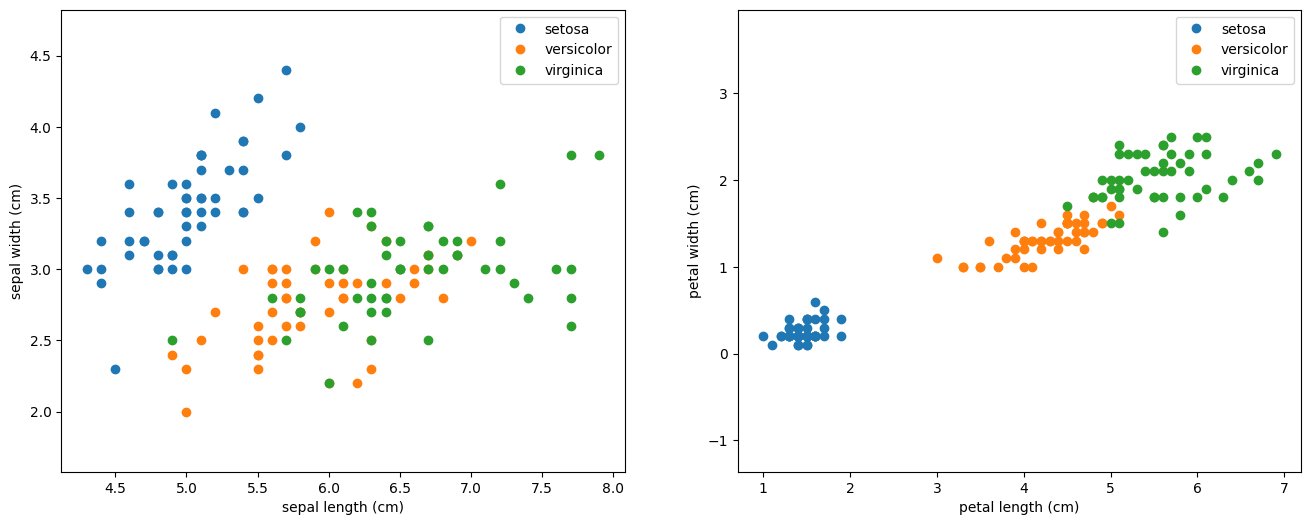

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [5]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [6]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [7]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 311.46it/s]


# Plot training progress

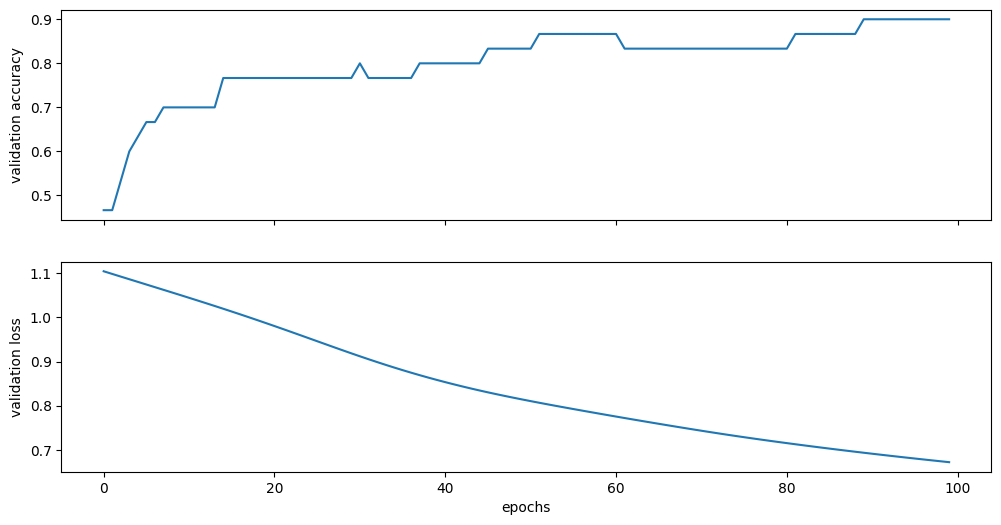

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

Sure, let's modify the number of hidden layers in the MLP classifiers. We can increase or decrease the number of hidden layers based on our requirements.

Let's add an additional hidden layer to the previous MLP classifiers:

python
Copy code
# Create and train MLP classifier for AND gate with two hidden layers
clf_and_two_hidden_layers = MLPClassifier(hidden_layer_sizes=(2, 2), activation='logistic', max_iter=1000)
clf_and_two_hidden_layers.fit(X_and, y_and_modified)

# Create and train MLP classifier for OR gate with two hidden layers
clf_or_two_hidden_layers = MLPClassifier(hidden_layer_sizes=(2, 2), activation='logistic', max_iter=1000)
clf_or_two_hidden_layers.fit(X_or, y_or_modified)

# Create and train MLP classifier for NOR gate with two hidden layers
clf_nor_two_hidden_layers = MLPClassifier(hidden_layer_sizes=(2, 2), activation='logistic', max_iter=1000)
clf_nor_two_hidden_layers.fit(X_nor, y_nor_modified)
Now, let's test these classifiers:

python
Copy code
# Predictions for AND gate with two hidden layers
predictions_and_two_hidden_layers = clf_and_two_hidden_layers.predict(test_inputs)
print("AND Gate Predictions (Two Hidden Layers):", predictions_and_two_hidden_layers)

# Predictions for OR gate with two hidden layers
predictions_or_two_hidden_layers = clf_or_two_hidden_layers.predict(test_inputs)
print("OR Gate Predictions (Two Hidden Layers):", predictions_or_two_hidden_layers)

# Predictions for NOR gate with two hidden layers
predictions_nor_two_hidden_layers = clf_nor_two_hidden_layers.predict(test_inputs)
print("NOR Gate Predictions (Two Hidden Layers):", predictions_nor_two_hidden_layers)
By adding additional hidden layers, the MLP classifiers may become more capable of capturing complex patterns in the data, potentially improving their performance on certain tasks. However, adding more layers also increases the complexity of the model, which may lead to overfitting if not carefully tuned.








Sure, let's modify the number of neurons in the hidden layer of the MLP classifiers. We can increase or decrease the number of neurons in each hidden layer based on our requirements.

Let's change the number of neurons in the hidden layer to 4 for each MLP classifier:

python
Copy code
# Create and train MLP classifier for AND gate with 4 neurons in the hidden layer
clf_and_four_neurons = MLPClassifier(hidden_layer_sizes=(4,), activation='logistic', max_iter=1000)
clf_and_four_neurons.fit(X_and, y_and_modified)

# Create and train MLP classifier for OR gate with 4 neurons in the hidden layer
clf_or_four_neurons = MLPClassifier(hidden_layer_sizes=(4,), activation='logistic', max_iter=1000)
clf_or_four_neurons.fit(X_or, y_or_modified)

# Create and train MLP classifier for NOR gate with 4 neurons in the hidden layer
clf_nor_four_neurons = MLPClassifier(hidden_layer_sizes=(4,), activation='logistic', max_iter=1000)
clf_nor_four_neurons.fit(X_nor, y_nor_modified)
Now, let's test these classifiers:

python
Copy code
# Predictions for AND gate with 4 neurons in the hidden layer
predictions_and_four_neurons = clf_and_four_neurons.predict(test_inputs)
print("AND Gate Predictions (Four Neurons in Hidden Layer):", predictions_and_four_neurons)

# Predictions for OR gate with 4 neurons in the hidden layer
predictions_or_four_neurons = clf_or_four_neurons.predict(test_inputs)
print("OR Gate Predictions (Four Neurons in Hidden Layer):", predictions_or_four_neurons)

# Predictions for NOR gate with 4 neurons in the hidden layer
predictions_nor_four_neurons = clf_nor_four_neurons.predict(test_inputs)
print("NOR Gate Predictions (Four Neurons in Hidden Layer):", predictions_nor_four_neurons)
Changing the number of neurons in the hidden layer alters the capacity and complexity of the model. Increasing the number of neurons may enable the MLP to learn more complex patterns in the data, while decreasing the number of neurons may lead to a simpler model with potentially reduced capacity to capture complex relationships. It's essential to strike a balance and choose an appropriate number of neurons based on the complexity of the problem and the available data.

Certainly, let's use a different activation function for the MLP classifiers. We can experiment with various activation functions to observe their effects on the model's performance.

Let's use the Rectified Linear Unit (ReLU) activation function, which is commonly used in deep learning models:

python
Copy code
# Create and train MLP classifier for AND gate with ReLU activation function
clf_and_relu = MLPClassifier(hidden_layer_sizes=(2,), activation='relu', max_iter=1000)
clf_and_relu.fit(X_and, y_and_modified)

# Create and train MLP classifier for OR gate with ReLU activation function
clf_or_relu = MLPClassifier(hidden_layer_sizes=(2,), activation='relu', max_iter=1000)
clf_or_relu.fit(X_or, y_or_modified)

# Create and train MLP classifier for NOR gate with ReLU activation function
clf_nor_relu = MLPClassifier(hidden_layer_sizes=(2,), activation='relu', max_iter=1000)
clf_nor_relu.fit(X_nor, y_nor_modified)
Now, let's test these classifiers:

python
Copy code
# Predictions for AND gate with ReLU activation function
predictions_and_relu = clf_and_relu.predict(test_inputs)
print("AND Gate Predictions (ReLU Activation):", predictions_and_relu)

# Predictions for OR gate with ReLU activation function
predictions_or_relu = clf_or_relu.predict(test_inputs)
print("OR Gate Predictions (ReLU Activation):", predictions_or_relu)

# Predictions for NOR gate with ReLU activation function
predictions_nor_relu = clf_nor_relu.predict(test_inputs)
print("NOR Gate Predictions (ReLU Activation):", predictions_nor_relu)
Using the ReLU activation function can introduce non-linearity into the model and help mitigate issues like the vanishing gradient problem, especially in deeper networks. It's worth experimenting with different activation functions to find the one that best suits the problem at hand and yields the desired performance.






